In [1]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_general
import numpy as np

In [2]:
L = 6
Jx = 1
Jy = 1
h = np.zeros(L)

In [3]:
basis = spin_basis_general(L, pauli = False)

In [4]:
J_xx = [[Jx, i, i+1] for i in range(L-1)]
J_yy = [[Jy*((1 + (-1)**i)/2), i, i+1] for i in range(L-1)] 
h_z = [[h[i], i] for i in range(L)]

In [5]:
static = [["xx", J_xx],["yy", J_yy]]
dynamic = []

In [6]:
H_OBC = hamiltonian(static, dynamic, basis = basis, dtype = np.float64)

Hermiticity check passed!
Symmetry checks passed!


In [7]:
E = H_OBC.eigvalsh()

In [8]:
E,V = H_OBC.eigh()

In [9]:
E

array([-1.62348980e+00, -1.40096887e+00, -1.12348980e+00, -1.12348980e+00,
       -1.12348980e+00, -1.00000000e+00, -9.00968868e-01, -9.00968868e-01,
       -9.00968868e-01, -7.77479066e-01, -7.22520934e-01, -6.23489802e-01,
       -6.23489802e-01, -6.23489802e-01, -5.00000000e-01, -5.00000000e-01,
       -5.00000000e-01, -5.00000000e-01, -4.00968868e-01, -4.00968868e-01,
       -4.00968868e-01, -2.77479066e-01, -2.77479066e-01, -2.77479066e-01,
       -2.22520934e-01, -2.22520934e-01, -2.22520934e-01, -1.23489802e-01,
       -9.90311321e-02, -1.91587374e-15, -1.37184594e-15, -6.62476981e-16,
       -2.60602467e-16, -9.88651569e-17,  7.43315810e-16,  9.90311321e-02,
        1.23489802e-01,  2.22520934e-01,  2.22520934e-01,  2.22520934e-01,
        2.77479066e-01,  2.77479066e-01,  2.77479066e-01,  4.00968868e-01,
        4.00968868e-01,  4.00968868e-01,  5.00000000e-01,  5.00000000e-01,
        5.00000000e-01,  5.00000000e-01,  6.23489802e-01,  6.23489802e-01,
        6.23489802e-01,  

In [10]:
H_OBC.shape

(64, 64)

In [11]:
print(V)

[[ 2.88895512e-18  6.57559427e-02 -8.46390917e-03 ...  2.63473051e-03
  -6.57559427e-02  2.63667828e-18]
 [ 8.19963194e-02  1.11022302e-16  4.16333634e-16 ...  5.81132364e-16
   1.11022302e-16 -8.19963194e-02]
 [-8.19963194e-02 -5.55111512e-17 -6.10622664e-16 ...  4.21537805e-16
   1.11022302e-16 -8.19963194e-02]
 ...
 [ 8.19963194e-02 -1.15447374e-17 -4.79333805e-16 ... -6.17567460e-16
  -9.83622259e-18 -8.19963194e-02]
 [-8.19963194e-02  1.02561665e-17  3.38680480e-16 ... -3.17653501e-16
  -9.04077359e-18 -8.19963194e-02]
 [-3.14995297e-18 -6.57559427e-02 -8.46390917e-03 ... -2.63473051e-03
  -6.57559427e-02 -6.30338258e-18]]


In [12]:
static =[ ['z',[[1,i] for i in range(L)]]]
dynamic = []
M = hamiltonian(static,dynamic,basis=basis,dtype=np.complex128 )

Hermiticity check passed!
Symmetry checks passed!


In [13]:
M.expt_value(V[:,0])

np.complex128(3.469446951953614e-17+0j)

In [14]:
Emin, Emax = H_OBC.eigsh(k=2, which = "BE", maxiter = 1E4, return_eigenvectors = False)

In [15]:
print(Emin)
print(Emax)

-1.6234898018587318
1.623489801858732


In [ ]:
# # calculate the eigenstate closest to energy E_star
# E_star = 0.0
# # E,psi_0 = H_OBC.eigsh(k=1,sigma=E_star,maxiter=1E4)
# E, psi_0 = H_OBC.eigsh(k=1, which="SA")
# psi_0 = psi_0.reshape((-1,))

### How magnetization changes with magnetic field

In [16]:
def construct_H(h):
    """
    Construct the 1D compass model Hamiltonian for a given uniform magnetic field h.
    H = Σ Jx S^x_i S^x_{i+1} + Σ Jy_i S^y_i S^y_{i+1} + Σ h S^z_i
    """

    # J_xx term (uniform)
    J_xx = [[Jx, i, i+1] for i in range(L-1)]

    # J_yy term (staggered Jy ((1+(-1)^i)/2))
    J_yy = [[Jy * ((1 + (-1)**i)/2), i, i+1] for i in range(L-1)]

    # Magnetic field term (uniform field h)
    h_z = [[h, i] for i in range(L)]

    static = [["xx", J_xx],
              ["yy", J_yy],
              ["z", h_z]]

    return hamiltonian(static, [], basis=basis, dtype=np.float64)


# --- magnetization operator M = (1/L) Σ S^z_i ---
M_static = [["z", [[1.0/L, i] for i in range(L)]]]
M = hamiltonian(M_static, [], basis=basis, dtype=np.float64)


# --- Sweep magnetic field values ---
h_values = np.linspace(-2, 2, 50)
mag_values = []

for h in h_values:
    H = construct_H(h)
    E, V = H.eigh()        # full diagonalization because system small
    gs = V[:, 0]           # ground state wavefunction

    Mgs = M.expt_value(gs) # magnetization expectation value
    mag_values.append(Mgs)

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


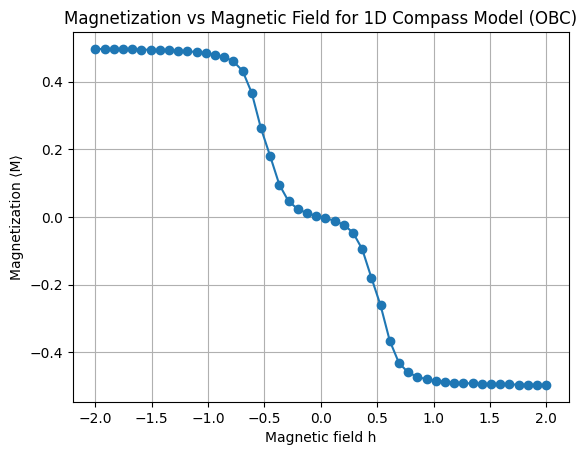

In [18]:
import matplotlib.pyplot as plt

# --- Plot ---
plt.plot(h_values, mag_values, marker='o')
plt.xlabel("Magnetic field h")
plt.ylabel("Magnetization ⟨M⟩")
plt.title("Magnetization vs Magnetic Field for 1D Compass Model (OBC)")
plt.grid(True)
plt.savefig('Plot.pdf')
plt.show()